In [394]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

training_path='./data/Training'
validation_path='./data/Validation'
training_folders=os.listdir(training_path)
validation_folders=os.listdir(validation_path)

In [395]:
def createDF(path):
    init_df=pd.read_csv(path)
    time_to_drop=math.ceil(init_df["Time"][0])+7
    init_df=init_df[init_df["Time"]>time_to_drop]
    if 'Alone' in path:
        o=pd.read_csv('./data/HandRight.csv')# o for other df
        init_df.insert(loc=1,column='label',value=0)
        init_df=init_df[init_df[' Hand Type']=='left']
        init_df=init_df.drop(columns=' # hands',axis=1)
        o=o.drop(columns=[' # hands','Time'],axis=1)
        o=o[o[' Hand Type']=='right']
       # print(o['Time'][0])
        o=o.drop([' Frame ID'],axis=1)
        o=o.iloc[:len(init_df)]
        o=o.reset_index(drop=True)
        init_df=init_df.reset_index(drop=True)
        init_df= pd.merge(init_df,o,left_index=True,right_index=True,how='left')
        
    else:
        init_df=init_df[init_df[' # hands']==2]
        init_df=init_df.drop(columns=' # hands',axis=1)
        if 'Sync' in file:
            init_df.insert(loc=1,column='label',value=1)
        if 'Spontan' in file:
            init_df.insert(loc=1,column='label',value=2)
        left_hand=init_df[init_df[' Hand Type']=='left']
        right_hand=init_df[init_df[' Hand Type']=='right']
        left_hand.reset_index(drop=True,inplace=True)
        right_hand.reset_index(drop=True,inplace=True)
        init_df=pd.merge(left_hand,right_hand, how='inner', on=["Time"," Frame ID","label"])  
        #init_df=pd.merge(init_df[init_df[' Hand Type']=='left'], init_df[init_df[' Hand Type']=='right'], how='inner', on=["Time"," Frame ID","label"])
    init_df=init_df.dropna()
    init_df = init_df[init_df.index%10 == 9]
    return init_df

In [396]:
train_df=pd.DataFrame()
test_df=pd.DataFrame()

for folder in training_folders:
    for file in os.listdir(training_path+'/'+folder):
        #t_df=pd.read_csv(training_path+'/'+folder+'/'+file)
        train_df=pd.concat([train_df,createDF(training_path+'/'+folder+'/'+file)])
        #train_df.reset_index(drop=True)
       # break
for folder in validation_folders:
    for file in os.listdir(validation_path+'/'+folder):
        test_df=pd.concat([test_df,createDF(validation_path+'/'+folder+'/'+file)])
        
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

pd.set_option("display.max_columns", None)
train_df=train_df.drop(columns=' Frame ID')
test_df=test_df.drop(columns=' Frame ID')
train_df[" Hand Type_x"] = train_df[" Hand Type_x"].replace({'left': 0, 'right': 1})
test_df[" Hand Type_x"] = test_df[" Hand Type_x"].replace({'left': 0, 'right': 1})
train_df[" Hand Type_y"] = train_df[" Hand Type_y"].replace({'left': 0, 'right': 1})
test_df[" Hand Type_y"] = test_df[" Hand Type_y"].replace({'left': 0, 'right': 1})

<AxesSubplot:xlabel='label', ylabel='count'>

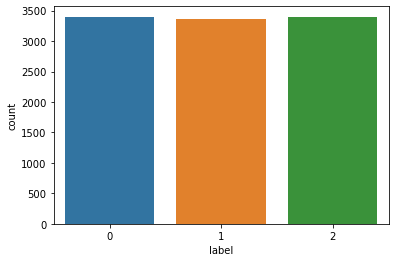

In [151]:
#df[df[" Frame ID"].value_counts==1]
sns.countplot(data=train_df,x='label')


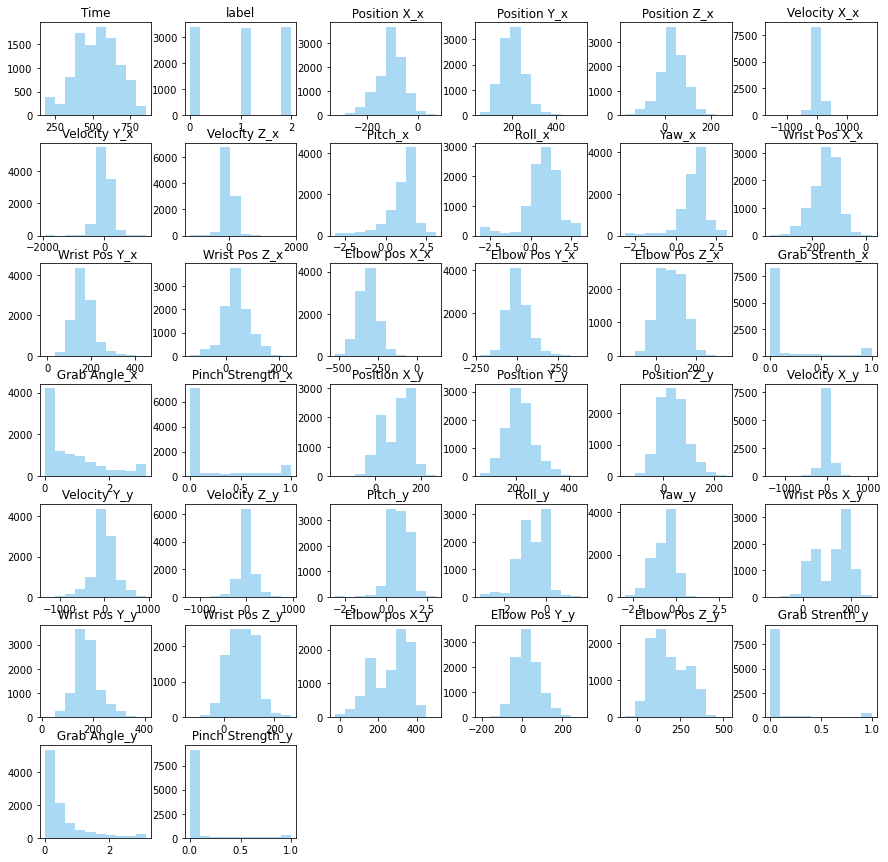

In [285]:
train_df.drop(columns=[' Hand Type_x',' Hand Type_y']).hist(stacked=True,figsize=(15,15),color='#56B4E9', alpha=0.5,grid=False)
plt.show()

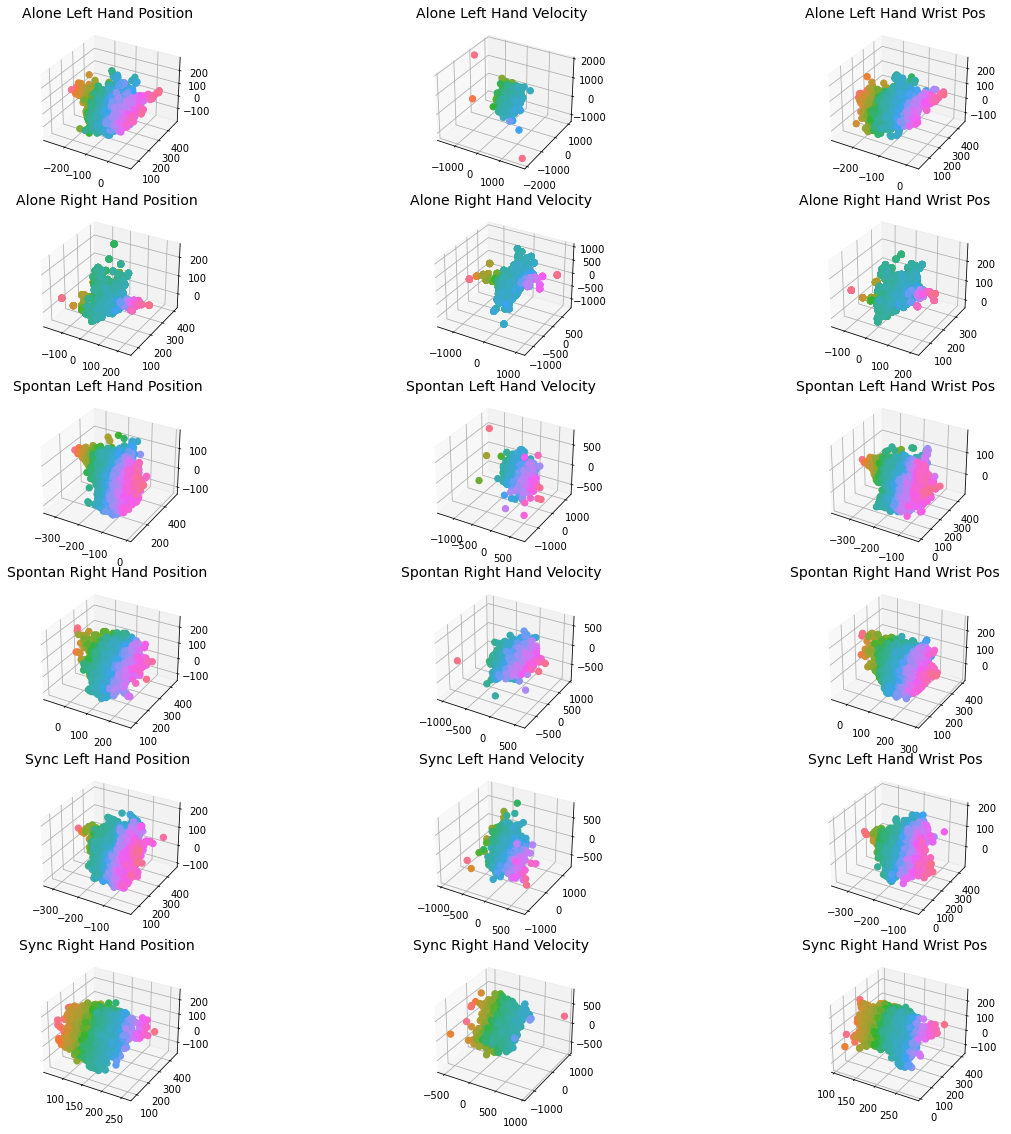

In [267]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
i=1
j=0
lab=['Alone ','Spontan ','Sync ']
fig = plt.figure(figsize=(20,20))
for label in [0,1,2]:
    train_x=train_df[train_df['label']==label]
    for hand in ['x','y']:
        h='Left Hand' if hand=='x' else 'Right Hand'
        #j+=1
        for typ in [' Position ',' Velocity ',' Wrist Pos ']:
           # h_t=hand=='x'?1:'Right Hand'
            labs=lab[label]+h+typ
            # axes instance
            ax = fig.add_subplot(6,3,i,projection='3d')#Axes3D(fig)
            i+=1
            # get colormap from seaborn
            cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
            x=train_x[typ+'X_'+hand]
            y=train_x[typ+'Y_'+hand]
            z=train_x[typ+'Z_'+hand]
            # plot
            sc = ax.scatter(x,y,z, s=40,marker='o',label=labs,c=x, cmap=cmap, alpha=1)
            ax.set_title(labs,
             fontsize = 14)

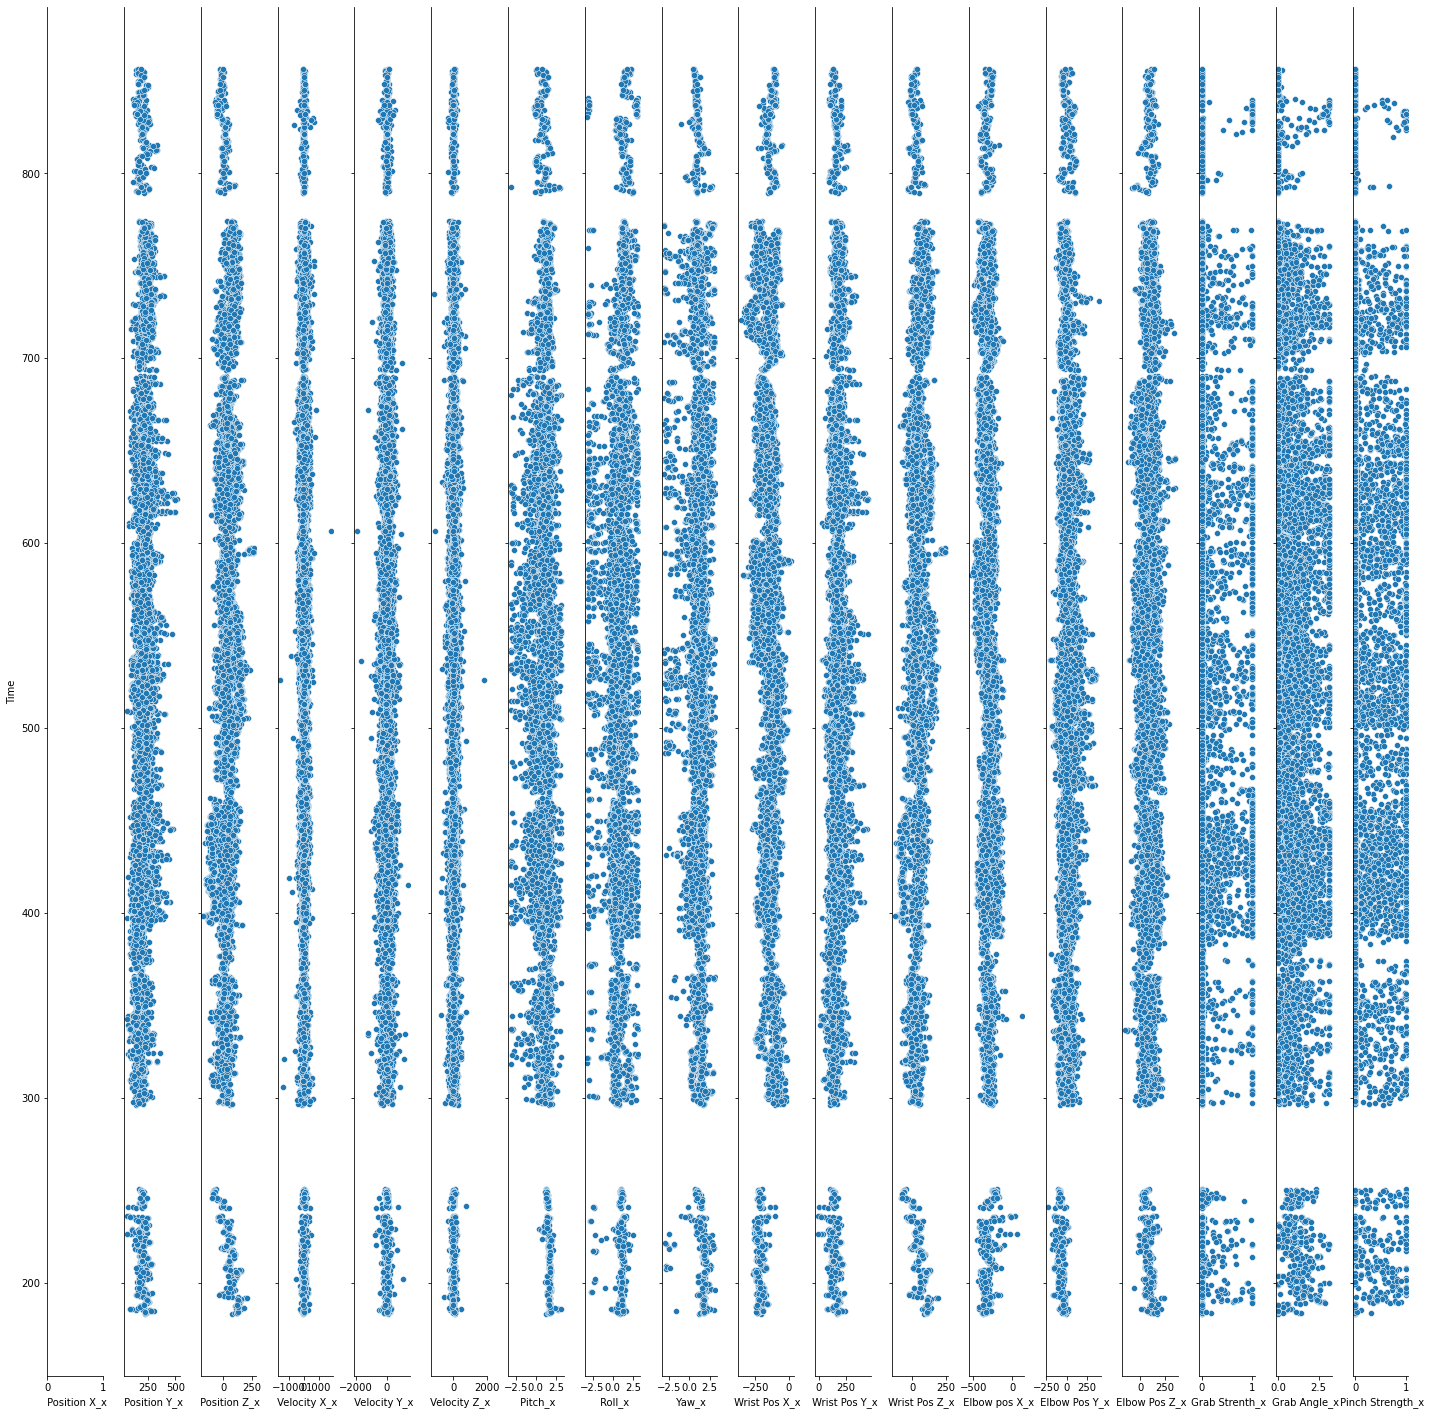

In [176]:
g=sns.pairplot(data=train_df,
            y_vars=['Time'],
            x_vars=[' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x'],
            kind='scatter',palette=sns.color_palette("mako", as_cmap=True))
g.fig.set_size_inches(20,20)
g.tight_layout()

In [286]:
train_df.head()

,Time,label,Hand Type_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,Hand Type_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,185.3158,2,0,-166.15040,141.0477,131.795300,-70.553960,-517.43550,-209.24650,2.792226,0.070543,1.808052,-229.9353,131.29210,112.62420,-386.5225,-53.70169,156.49320,0.000000,0.542168,0.118913,1,140.9558,153.4466,81.579470,-31.80022,-123.60470,197.96590,-2.575305,0.149956,-1.812133,205.4390,161.4307,62.55096,421.0050,49.72776,104.02950,0.000000,0.169250,0.0
1,675.4515,1,0,-190.50980,217.8371,56.867510,36.738180,-168.27360,-20.68253,1.621292,1.194628,1.708659,-219.2896,153.15870,44.35084,-407.9433,-17.45707,13.34056,0.070962,1.871302,0.000000,1,174.3515,203.7279,66.813930,-115.73970,-313.50130,-95.23872,1.470485,-0.859724,-1.451522,225.8077,152.9333,65.70280,417.6275,-16.25698,81.24073,0.660583,1.630353,0.0
2,488.9100,1,0,-70.80397,118.9160,31.617920,-11.937240,-311.15910,-50.40862,1.090119,1.154112,0.936044,-111.6445,68.97371,52.35471,-299.6132,-21.37973,175.89540,0.000000,0.000000,0.000000,1,133.5546,133.6540,-7.182731,104.42200,-65.36038,27.95499,0.906859,-1.131764,-0.421712,157.9418,82.3969,30.27354,231.1209,-47.32613,221.51950,0.000000,0.000000,0.0
3,522.1894,2,0,-102.27710,228.5255,143.910500,6.569093,-16.04389,5.65701,1.487797,1.348905,1.166626,-127.2369,160.31490,144.15530,-291.6911,-37.54473,158.21190,0.000000,1.249230,0.778483,1,170.8065,263.7270,90.058330,153.17620,120.66420,199.81120,1.546751,-1.326152,-1.468927,197.1265,195.9379,87.79089,323.1330,-28.46725,100.27880,0.000000,0.000000,0.0
4,441.4958,2,0,-69.66891,170.2429,1.652394,1.900831,48.45079,-33.15305,-0.046013,0.756994,0.893110,-124.2717,158.94020,39.54965,-192.0593,-43.85532,159.03740,0.000000,2.570970,0.804852,1,211.6741,257.4221,55.214740,130.87090,99.90206,104.35690,0.908601,-0.787382,-0.732680,252.5497,210.5863,85.56641,399.6674,31.76122,165.41920,0.000000,0.240405,0.0


<AxesSubplot:>

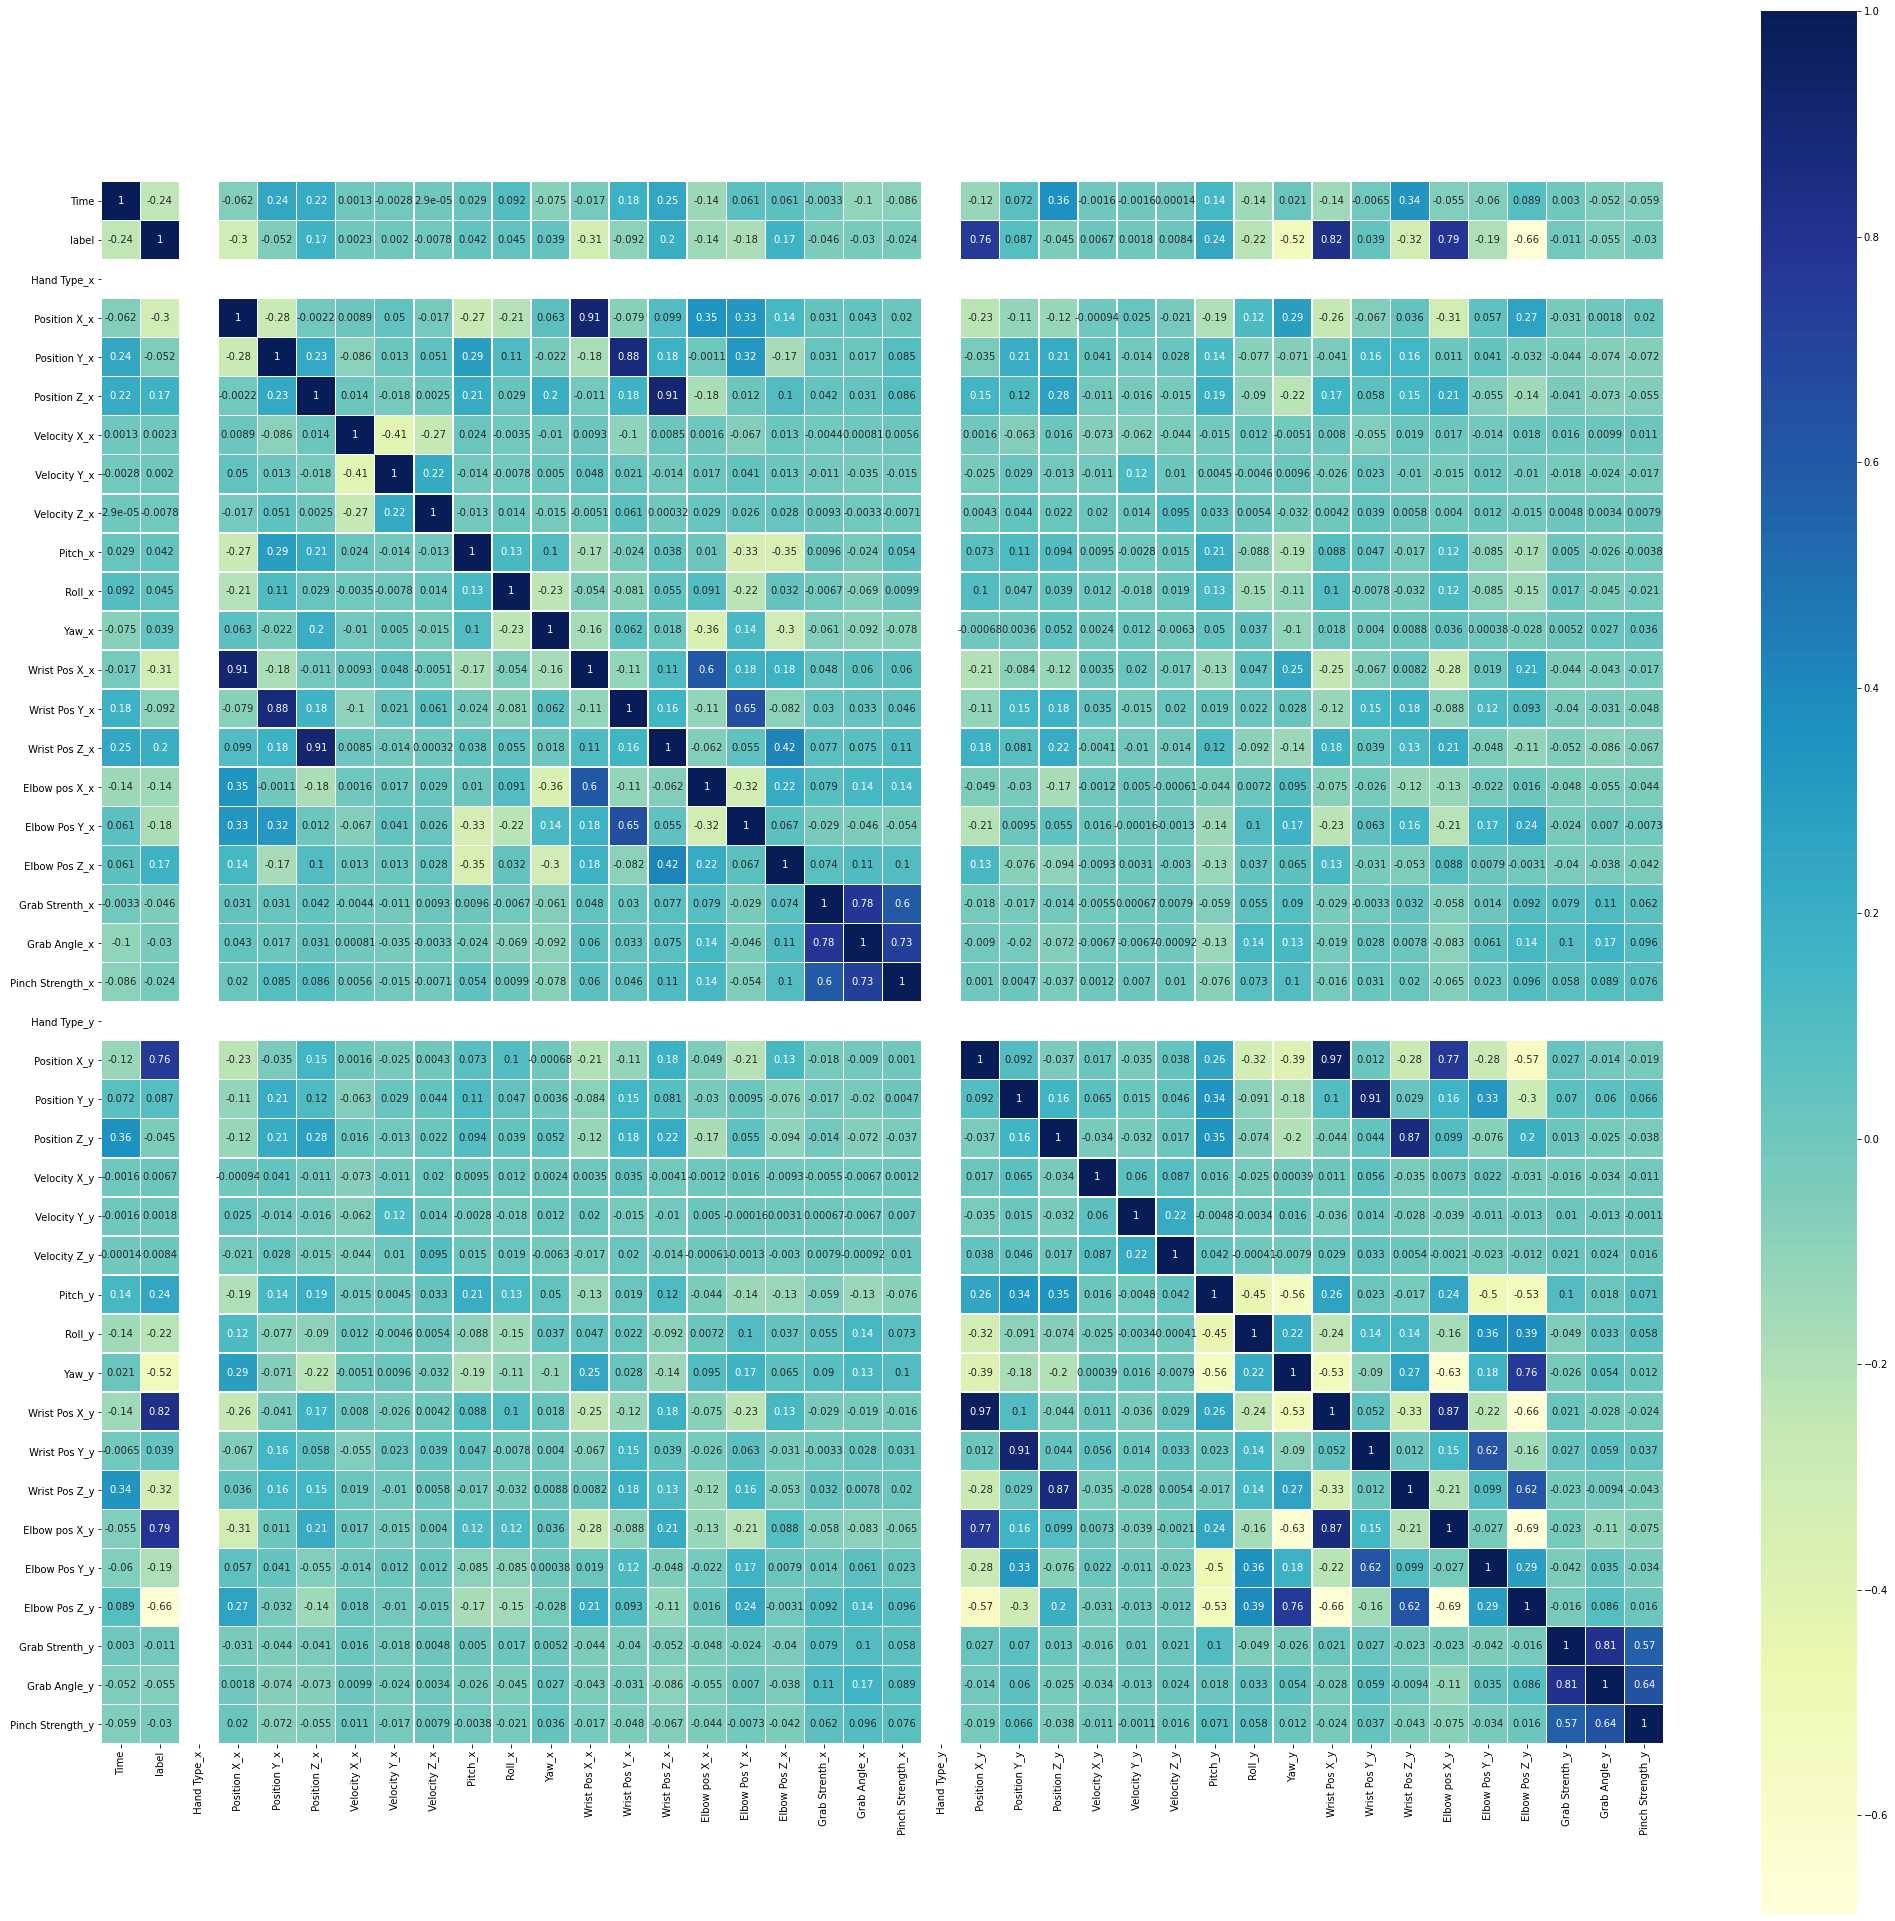

In [290]:
plt.figure(figsize=(35,35))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu",square=True,linewidths=0.5)

In [397]:
x_train=train_df.drop(columns='label')
y_train=train_df['label']
x_test=test_df.drop(columns='label')
y_test=test_df['label']

In [398]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
std_scalar=StandardScaler()
minmax_scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
#x_train=minmax_scalar.fit_transform(x_train)
#x_test=minmax_scalar.transform(x_test)

In [399]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
fpr=dict()
tpr=dict()
tps=dict()
aucs=[]
i=0
def get_stats(model):
    c_pred=model.predict(x_test)
    c_prob=model.predict_proba(x_test)
    c_prob = c_prob[:, 1]
    con=metrics.plot_confusion_matrix(model, x_test, y_test,cmap="viridis")
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)
    plt.show()
    print(classification_report(y_test,c_pred))
    print(f"{type(model).__name__} Accuracy:", metrics.accuracy_score(y_test, c_pred))

## XGBoostClassifier:

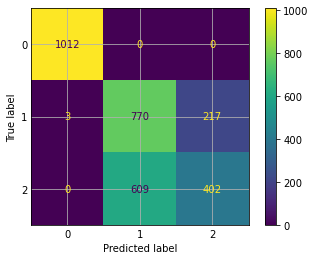

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       0.56      0.78      0.65       990
           2       0.65      0.40      0.49      1011

    accuracy                           0.72      3013
   macro avg       0.73      0.73      0.71      3013
weighted avg       0.74      0.72      0.71      3013

XGBClassifier Accuracy: 0.7248589445735147


In [380]:

xgb_clf=xgb.XGBClassifier( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=10,
             monotone_constraints='()', n_estimators=400, n_jobs=-1,
             num_parallel_tree=1, objective='multi:softprob', random_state=42,
             reg_alpha=1, reg_lambda=5, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(x_train,y_train)
get_stats(xgb_clf)

## LogisticRegression

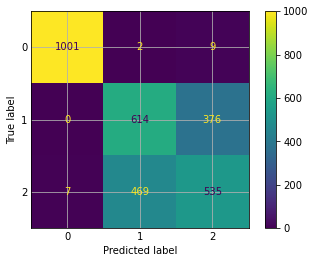

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1012
           1       0.57      0.62      0.59       990
           2       0.58      0.53      0.55      1011

    accuracy                           0.71      3013
   macro avg       0.71      0.71      0.71      3013
weighted avg       0.71      0.71      0.71      3013

LogisticRegression Accuracy: 0.7135745104546963


In [400]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
get_stats(lr_clf)

### checking for the best n_neighbors for knn

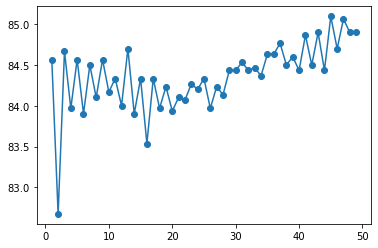

In [365]:
kn_scrs=[]
for l in range(1,50):
    k=KNeighborsClassifier(n_neighbors=l)
    k.fit(x_train,y_train)
    pred_l=k.predict(x_test)
    kn_scrs.append(metrics.accuracy_score(y_test,pred_l)*100)
plt.plot(range(1,50),kn_scrs,marker='o')

## Knn

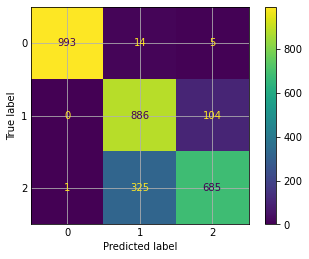

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1012
           1       0.72      0.89      0.80       990
           2       0.86      0.68      0.76      1011

    accuracy                           0.85      3013
   macro avg       0.86      0.85      0.85      3013
weighted avg       0.86      0.85      0.85      3013

KNeighborsClassifier Accuracy: 0.8509790906073681


In [401]:
knn_clf=KNeighborsClassifier(n_neighbors=45,weights='distance')
knn_clf.fit(x_train,y_train)
get_stats(knn_clf)

## AdaBoost

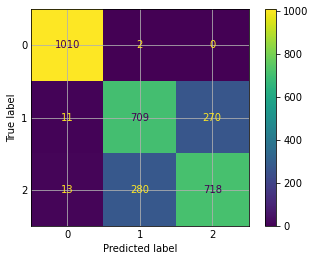

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1012
           1       0.72      0.72      0.72       990
           2       0.73      0.71      0.72      1011

    accuracy                           0.81      3013
   macro avg       0.81      0.81      0.81      3013
weighted avg       0.81      0.81      0.81      3013

AdaBoostClassifier Accuracy: 0.8088284102223697


In [402]:
ada_clf=AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                   learning_rate=0.01, n_estimators=100)
ada_clf.fit(x_train,y_train)
get_stats(ada_clf)

## Random forest

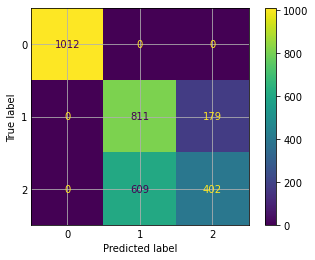

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       0.57      0.82      0.67       990
           2       0.69      0.40      0.51      1011

    accuracy                           0.74      3013
   macro avg       0.75      0.74      0.73      3013
weighted avg       0.76      0.74      0.73      3013

RandomForestClassifier Accuracy: 0.7384666445403253


In [403]:
rf_clf=RandomForestClassifier(n_estimators=400,max_depth=10)
rf_clf.fit(x_train,y_train)
get_stats(rf_clf)

## ExtraTrees (much like Random forest)

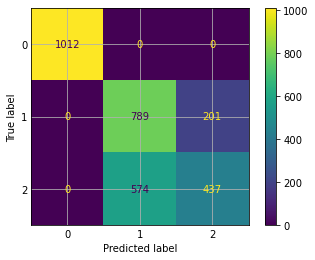

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       0.58      0.80      0.67       990
           2       0.68      0.43      0.53      1011

    accuracy                           0.74      3013
   macro avg       0.75      0.74      0.73      3013
weighted avg       0.76      0.74      0.73      3013

ExtraTreesClassifier Accuracy: 0.7427812811151676


In [404]:
xrf_clf=ExtraTreesClassifier(n_estimators=400,max_depth=10)
xrf_clf.fit(x_train,y_train)
get_stats(xrf_clf)

# Stacking

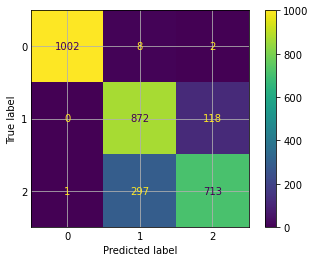

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1012
           1       0.74      0.88      0.80       990
           2       0.86      0.71      0.77      1011

    accuracy                           0.86      3013
   macro avg       0.87      0.86      0.86      3013
weighted avg       0.87      0.86      0.86      3013

StackingClassifier Accuracy: 0.8586126783936276


In [414]:
stk_clf= StackingClassifier(
        estimators=[
          ('knn',knn_clf ),
          ('ada', ada_clf),
          ('bag',bag_clf)
        ],final_estimator=lr_clf
    ,n_jobs=-1)
stk_clf.fit(x_train,y_train)
get_stats(stk_clf)

# Voting

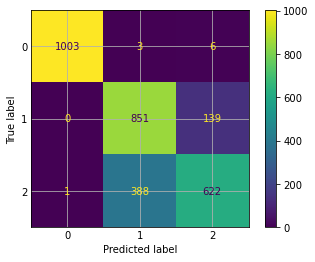

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1012
           1       0.69      0.86      0.76       990
           2       0.81      0.62      0.70      1011

    accuracy                           0.82      3013
   macro avg       0.83      0.82      0.82      3013
weighted avg       0.83      0.82      0.82      3013

VotingClassifier Accuracy: 0.8217723199468968


In [406]:
vote_clf =VotingClassifier(estimators=[
            ('knn',knn_clf),
            ('ada',ada_clf),
            ('lr',lr_clf)
        ], voting='soft',weights=[5,1,2], n_jobs=-1,verbose=True)
vote_clf.fit(x_train,y_train)
get_stats(vote_clf)


# Bagging

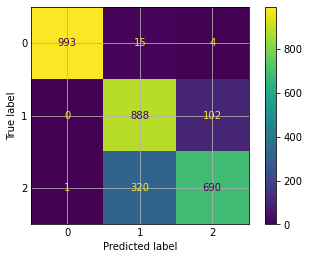

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1012
           1       0.73      0.90      0.80       990
           2       0.87      0.68      0.76      1011

    accuracy                           0.85      3013
   macro avg       0.86      0.85      0.85      3013
weighted avg       0.86      0.85      0.85      3013

BaggingClassifier Accuracy: 0.8533023564553601


In [416]:
bag_clf=BaggingClassifier(knn_clf)
bag_clf.fit(x_train,y_train)
get_stats(bag_clf)

# Finally we saw that the stacking Classifier with 85.8% Accuracy is the winner

## here im adding the Grid and Randomized search i've done,
## side note: i've also tried kmean with pipeline but it utterly failed so i dropped it

In [ ]:
# knn_grid={'n_neighbors':[120,200,300]}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# knn_gs_results =knn_gs.fit(x_red,y_train)
# xgb_grid={'n_estimators':[150,200,300,400],'learning_rate':[0.1,0.5,1]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=5,
#                     scoring='accuracy',verbose=10,n_jobs=-1)
# xgb_gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier(n_estimators=1200)
#                            ]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# ada_gs_results=ada_gs.fit(x_red,y_train)
# xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
# xrf_gs=GridSearchCV(ExtraTreesClassifier(bootstrap=True,oob_score=True,random_state=42),xrf_grid,cv=5, scoring='accuracy',verbose=10,n_jobs=-1)
# xrf_gs_result=xrf_gs.fit(x_red,y_train)
# ada_params={'lr':LogisticRegression(),'rf':RandomForestClassifier(n_estimators=400,oob_score=True),'XRF':ExtraTreesClassifier()}
#C = np.logspace(0, 4, num=10)
#penalty = ['l1', 'l2']
#solver = ['liblinear', 'saga']
#hyperparameters = dict(C=C, penalty=penalty, solver=solver)
#randomizedsearch = RandomizedSearchCV(LogisticRegression(), hyperparameters,random_state=42, n_iter=100, cv=5, verbose=0, n_jobs=-1)
#best_model_random = randomizedsearch.fit(x_train, y_train)
#print(best_model_random.best_estimator_)
#LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear')
#parameters = {'booster':['gbtree','gblinear'],
#              'learning_rate': [0.01,0.05,0.1,0.5], 
#              'max_depth': [2,3,5,6],
#              'min_child_weight': [5,10,15,20],
#              'colsample_bytree': [0.4,0.8, 0.9, 1],
#              'n_estimators': [400,500,600,1000],
#              "reg_alpha"   : [0.5,0.2,1],
#              "reg_lambda"  : [2,3,5],
#              "gamma"       : [0,1,5,10]}
#xgb_model = xgb.XGBClassifier(random_state=42,eval_metric='auc')
#grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters,cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
#grid_obj_xgb.fit(x_train, y_train)
#print(grid_obj_xgb.best_estimator_)
#y_pred_train = grid_obj_xgb.predict(x_red)
# y_pred_test = grid_obj_xgb.predict(x_test_red)
# ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=1000),LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear'),
#                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1]}
# #err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')
#print(grid_obj_xgb.best_estimator_)
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.9, eval_metric='auc',
#               gamma=0, gpu_id=-1, importance_type='gain',
#               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#               max_depth=5, min_child_weight=15, missing=nan,
#               monotone_constraints='()', n_estimators=400, n_jobs=16,
#               num_parallel_tree=1, random_state=42, reg_alpha=0.2, reg_lambda=3,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               use_label_encoder=False, validate_parameters=1, verbosity=None)
#knn_params={'n_neighbors':[20,50,90,130],'leaf_size':[30,70,120]}
#knn_clf=KNeighborsClassifier()
#grid_obj_knn=RandomizedSearchCV(knn_clf,knn_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
#grid_obj_knn.fit(x_train,y_train)
#xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
#xrf_clf=ExtraTreesClassifier()
#print(grid_obj_knn.best_estimator_)
#
#grid_obj_xrf=RandomizedSearchCV(xrf_clf,xrf_grid, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
#grid_obj_xrf.fit(x_train,y_train)
#print(grid_obj_xrf.best_estimator_)

#ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=500),KNeighborsClassifier(n_neighbors=20),
#                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1],'n_estimators':[100,400,700]}
#ada_clf=AdaBoostClassifier()
#grid_obj_ada = RandomizedSearchCV(ada_clf,ada_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
#grid_obj_ada.fit(x_train,y_train)
#print(grid_obj_ada.best_estimator_)
# AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
#                    learning_rate=0.05)


# rf_params={'n_estimators':[100,300,600,1000],'max_depth':[3,5,7,10]}
# rf_clf=RandomForestClassifier()
# grid_obj_rf=RandomizedSearchCV(rf_clf,rf_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
# grid_obj_rf.fit(x_train,y_train)
# print(grid_obj_rf.best_estimator_)